## Pipeline
1. Design model(input, output, forward pass)
2. Construct loss and optimizer
3. Training loop
    * forward pass: compute prediction
    * backward pass: compute gradient
    * update weights

In [1]:
import torch 
import torch.nn as nn

### 自定義 forward、weight

In [2]:
X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)
w = torch.tensor(0, dtype=torch.float32, requires_grad=True)

learning_rate = 0.01
n_iter = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

In [4]:
def forward(x):
    return w*x

In [5]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

for epoch in range(n_iter):
    # forward pass
    Y_pred = forward(X)
    l = loss(Y,Y_pred)
    # backward pass
    l.backward()
    # update weights
    optimizer.step()
    # zero gradient
    optimizer.zero_grad()
    
    if epoch%1 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.5f}')
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000
epoch 2: w = 0.555, loss = 21.67500
epoch 3: w = 0.772, loss = 15.66019
epoch 4: w = 0.956, loss = 11.31449
epoch 5: w = 1.113, loss = 8.17472
epoch 6: w = 1.246, loss = 5.90623
epoch 7: w = 1.359, loss = 4.26725
epoch 8: w = 1.455, loss = 3.08309
epoch 9: w = 1.537, loss = 2.22753
epoch 10: w = 1.606, loss = 1.60939
epoch 11: w = 1.665, loss = 1.16279
epoch 12: w = 1.716, loss = 0.84011
epoch 13: w = 1.758, loss = 0.60698
epoch 14: w = 1.794, loss = 0.43854
epoch 15: w = 1.825, loss = 0.31685
epoch 16: w = 1.851, loss = 0.22892
epoch 17: w = 1.874, loss = 0.16540
epoch 18: w = 1.893, loss = 0.11950
epoch 19: w = 1.909, loss = 0.08634
epoch 20: w = 1.922, loss = 0.06238
epoch 21: w = 1.934, loss = 0.04507
epoch 22: w = 1.944, loss = 0.03256
epoch 23: w = 1.952, loss = 0.02353
epoch 24: w = 1.960, loss = 0.01700
epoch 25: w = 1.966, loss = 0.01228
epoch 26: w = 1.971, loss = 0.00887
epoch 27: w = 1.975, loss = 

### 選定模型：Linear

In [6]:
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_test = torch.tensor([[5]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size) # get weight

learning_rate = 0.01
n_iter = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

4 1


In [7]:
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

for epoch in range(n_iter):
    # forward pass
    Y_pred = model(X)
    l = loss(Y,Y_pred)
    # backward pass
    l.backward()
    # update weights
    optimizer.step()
    # zero gradient
    optimizer.zero_grad()
    
    if epoch%1 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.5f}')
print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

Prediction before training: f(5) = 3.966
epoch 1: w = 1.020, loss = 11.43904
epoch 2: w = 1.174, loss = 7.93873
epoch 3: w = 1.303, loss = 5.50993
epoch 4: w = 1.410, loss = 3.82463
epoch 5: w = 1.499, loss = 2.65523
epoch 6: w = 1.574, loss = 1.84380
epoch 7: w = 1.636, loss = 1.28075
epoch 8: w = 1.687, loss = 0.89006
epoch 9: w = 1.730, loss = 0.61896
epoch 10: w = 1.766, loss = 0.43084
epoch 11: w = 1.796, loss = 0.30030
epoch 12: w = 1.821, loss = 0.20971
epoch 13: w = 1.842, loss = 0.14685
epoch 14: w = 1.859, loss = 0.10322
epoch 15: w = 1.874, loss = 0.07294
epoch 16: w = 1.886, loss = 0.05192
epoch 17: w = 1.896, loss = 0.03733
epoch 18: w = 1.904, loss = 0.02719
epoch 19: w = 1.911, loss = 0.02015
epoch 20: w = 1.917, loss = 0.01526
epoch 21: w = 1.922, loss = 0.01186
epoch 22: w = 1.926, loss = 0.00949
epoch 23: w = 1.930, loss = 0.00784
epoch 24: w = 1.933, loss = 0.00669
epoch 25: w = 1.935, loss = 0.00588
epoch 26: w = 1.937, loss = 0.00531
epoch 27: w = 1.939, loss = 0.0

### 客製化模型

In [8]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.linear(x)

In [9]:
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_test = torch.tensor([[5]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

model = LinearRegression(input_size, output_size) # get weight from customized model

learning_rate = 0.01
n_iter = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

4 1


In [10]:
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

for epoch in range(n_iter):
    # forward pass
    Y_pred = model(X)
    l = loss(Y,Y_pred)
    # backward pass
    l.backward()
    # update weights
    optimizer.step()
    # zero gradient
    optimizer.zero_grad()
    
    if epoch%1 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.5f}')
print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

Prediction before training: f(5) = 0.621
epoch 1: w = 0.497, loss = 27.99979
epoch 2: w = 0.738, loss = 19.42999
epoch 3: w = 0.939, loss = 13.48358
epoch 4: w = 1.107, loss = 9.35749
epoch 5: w = 1.246, loss = 6.49447
epoch 6: w = 1.362, loss = 4.50787
epoch 7: w = 1.459, loss = 3.12940
epoch 8: w = 1.540, loss = 2.17290
epoch 9: w = 1.607, loss = 1.50920
epoch 10: w = 1.663, loss = 1.04866
epoch 11: w = 1.710, loss = 0.72910
epoch 12: w = 1.749, loss = 0.50735
epoch 13: w = 1.782, loss = 0.35347
epoch 14: w = 1.809, loss = 0.24669
epoch 15: w = 1.831, loss = 0.17259
epoch 16: w = 1.850, loss = 0.12117
epoch 17: w = 1.866, loss = 0.08548
epoch 18: w = 1.879, loss = 0.06070
epoch 19: w = 1.890, loss = 0.04350
epoch 20: w = 1.899, loss = 0.03156
epoch 21: w = 1.907, loss = 0.02327
epoch 22: w = 1.913, loss = 0.01750
epoch 23: w = 1.919, loss = 0.01350
epoch 24: w = 1.923, loss = 0.01071
epoch 25: w = 1.927, loss = 0.00876
epoch 26: w = 1.930, loss = 0.00741
epoch 27: w = 1.933, loss = 0

### sklearn dataset 實作 linear regression 建模

In [1]:
import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [13]:
# 0. data preparation
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(y)
y = y.view(y.shape[0], 1)
print(y)

n_samples, n_features = X.shape
print(n_samples, n_features)

tensor([-5.5539e+01, -1.0662e+01,  2.2757e+01,  1.0110e+02,  1.4434e+02,
         3.3289e+01,  3.3015e+01, -2.5887e+01, -9.9639e+01,  2.3803e+01,
        -4.5589e+01, -8.3388e+00, -9.5315e+01,  3.6407e+01, -8.7293e+01,
         6.7669e+01, -1.3687e+01, -5.5441e+01, -6.5340e+01, -5.4450e+01,
        -2.8835e+01,  1.7884e+02,  6.5084e+01,  2.6668e+01, -1.8546e+01,
        -4.1499e+01,  8.5583e-01,  4.4562e+01,  1.1598e+02, -6.4620e+01,
        -2.5931e+01, -6.0882e+01,  1.8720e+01,  7.5070e+01,  1.1720e+02,
        -2.2698e+01, -5.6363e+01,  1.8084e+02, -1.9257e+02,  6.8503e+01,
         1.6552e+02,  1.0500e+02, -7.0434e+01, -5.8769e+01, -4.1576e+01,
         7.3247e+01,  4.0966e+01,  8.0462e+01, -2.8794e+01,  3.4234e+01,
        -4.1715e+01,  1.4355e+01,  7.9336e+01,  2.7129e+01, -3.9487e+01,
         6.6805e+01,  9.5531e+01,  3.5610e+00,  1.0857e-01,  5.6495e+01,
         5.1575e+01, -2.0974e+00, -2.6656e+01,  3.9742e+01,  3.6101e+01,
        -7.5602e+01,  1.9713e+01, -7.1601e+01, -1.9

In [14]:
# 1. define model
input_size = n_features
output_size = 1
learning_rate = 0.01
model = nn.Linear(input_size, output_size)

# 2. define loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3. training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # backward pass
    loss.backward()
    
    # update weight
    optimizer.step()
    
    # zero gradient
    optimizer.zero_grad()
    
    if (epoch+1)%10 ==0:
        print(f'epoch {epoch+1}, loss = {loss.item():.4f}')

epoch 10, loss = 4475.8857
epoch 20, loss = 3338.3359
epoch 30, loss = 2515.0002
epoch 40, loss = 1918.4633
epoch 50, loss = 1485.8331
epoch 60, loss = 1171.7933
epoch 70, loss = 943.6487
epoch 80, loss = 777.7801
epoch 90, loss = 657.1039
epoch 100, loss = 569.2502


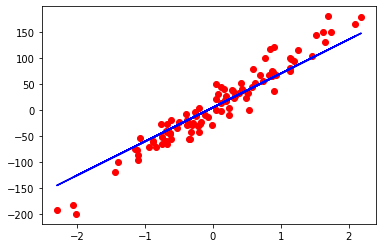

In [15]:
# plot
predicted = model(X).detach()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')

### sklearn dataset 實作 logistic regression 建模

In [18]:
import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [19]:
# 0. data preparation
data_bc = datasets.load_breast_cancer()
X, y = data_bc.data, data_bc.target
n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# data scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# turn into tensor
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

569 30


In [22]:
# 1. define model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        # define layers
        self.linear = nn.Linear(input_dim, 1)
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

learning_rate = 0.01
model = LogisticRegression(n_features)

# 2. define loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3. training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    
    # backward pass
    loss.backward()
    
    # update weight
    optimizer.step()
    
    # zero gradient
    optimizer.zero_grad()
    
    if (epoch+1)%10 ==0:
        print(f'epoch {epoch+1}, loss = {loss.item():.4f}')

# not to track gradient calculations
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_binary = y_pred.round()
    acc = y_pred_binary.eq(y_test).sum() / float(y_test.shape[0]) # y_pred_binary==y_test 時計數加一
    print(f'accuracy = {acc:.5f}')

epoch 10, loss = 0.5011
epoch 20, loss = 0.4250
epoch 30, loss = 0.3745
epoch 40, loss = 0.3382
epoch 50, loss = 0.3106
epoch 60, loss = 0.2889
epoch 70, loss = 0.2712
epoch 80, loss = 0.2564
epoch 90, loss = 0.2439
epoch 100, loss = 0.2330
accuracy = 0.89474
